In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#names_df = pd.read_csv("Resources/yob1978.txt", delimiter =",", names=["Name", "Gender", "YearOfBirth"],dtype={"Name":"str","Gender":"str", "YearOfBirth":np.int32})

start_year=1880
end_year=2019
yearlist= list(range(start_year,end_year,1))
#print(yearlist)
year_df=pd.DataFrame(yearlist)
year_df["dummy_col"]=1
year_df.set_index("dummy_col", inplace=True)
filename_list=[]
for file in os.listdir("names"):
    if file.endswith(".txt") and int(file[3:7]) >= start_year:
        df =  pd.read_csv("names/"+file, delimiter =",", names=["Name", "Gender", "CountOfNames"],dtype={"Name":"str","Gender":"str", "CountOfNames":np.int32})
        df["Year"] = int(file[3:7])
        
        df = df[["Year", "Name", "Gender", "CountOfNames"]]
        filename_list.append(df)
        
names_df = pd.concat(filename_list, axis=0, ignore_index=True)
names_df.sort_values(by=["Name","Gender","Year"], inplace=True)
unique_names_list = names_df.drop_duplicates(subset=["Name", "Gender"])[["Name", "Gender"]]
unique_names_list["dummy_col"]=1
unique_names_list.set_index("dummy_col", inplace=True)

final_data_set = unique_names_list.join(year_df,on="dummy_col",how = "outer")
final_data_set.count()
final_data_set.rename(columns={0:"Year"}, inplace=True)
final_data_set.count()

Name      15175047
Gender    15175047
Year      15175047
dtype: int64

In [3]:
### We have a dataset with entries for all names for all years of analysis. 
### We need to now update the counts of each row with the actual values.

data_set_with_counts = final_data_set.merge(names_df, on=["Name", "Gender", "Year"], how = "outer")
data_set_with_counts.fillna(0, inplace = True)
data_set_with_counts["Percent_Change"] = data_set_with_counts["CountOfNames"].pct_change() * 100
final_data_set.count()

Name      15175047
Gender    15175047
Year      15175047
dtype: int64

In [4]:
data_set_with_counts.count()

Name              15175047
Gender            15175047
Year              15175047
CountOfNames      15175047
Percent_Change     2355642
dtype: int64

In [5]:
names_df.head(5)

,Year,Name,Gender,CountOfNames
1586216,2007,Aaban,M,5
1654500,2009,Aaban,M,6
1685983,2010,Aaban,M,9
1718670,2011,Aaban,M,11
1752571,2012,Aaban,M,11


In [6]:
data_set_with_counts.loc[(data_set_with_counts["Name"] =="Aaban") & (data_set_with_counts["Year"]>= 2005)]

,Name,Gender,Year,CountOfNames,Percent_Change
125,Aaban,M,2005,0.0,NaN
126,Aaban,M,2006,0.0,NaN
127,Aaban,M,2007,5.0,inf
128,Aaban,M,2008,0.0,-100.000000
129,Aaban,M,2009,6.0,inf
130,Aaban,M,2010,9.0,50.000000
131,Aaban,M,2011,11.0,22.222222
132,Aaban,M,2012,11.0,0.000000
133,Aaban,M,2013,14.0,27.272727
134,Aaban,M,2014,16.0,14.285714


In [7]:
# big_spikes_df = data_set_with_counts.loc[(data_set_with_counts["CountOfNames"]>1000) 
#                          & (data_set_with_counts["Percent_Change"]>300) 
#                          & (data_set_with_counts["Year"]>1880) 
#                          & (data_set_with_counts["Percent_Change"]!=float('inf'))]

# big_spikes_df.to_csv('big_spikes.csv')

In [27]:
# line plot function
def getPlot(name,gender,center):
    # get a dataframe for just that name and gender
    plot_df = data_set_with_counts.loc[(data_set_with_counts['Name']==name) & (data_set_with_counts['Gender']==gender) ]
    
    # set the series to plot
    x_axis = plot_df['Year']
    values = plot_df['CountOfNames']
    # create the plot
    plt.figure(figsize=[15,5])
    plt.plot(x_axis,values,color = 'coral',marker = 'o')
    
    # set the axes limits and ticks
    plt.ylim(0,max(values)*1.05)
    plt.xlim(center-30,center+30)
    plt.xticks(np.arange(center-30,center+30,10))
    # draw a horizontal line at the center
    plt.vlines(center,0,max(values)*1.05, color = 'blue')
    
    # other chart elements
    plt.title(f'Popularity of "{name}" ({gender})')
    plt.ylabel('Count')
    plt.xlabel('Year')
    plt.grid()
    # plt.savefig(f'plots/{name}-{gender}.png', dpi=600)

In [28]:
def getPlot2(name,gender,center):
    # get a dataframe for that year and gender
    plot_df = data_set_with_counts.loc[(data_set_with_counts['Year']==center) & (data_set_with_counts['Gender']==gender)]
    plot_df1 = data_set_with_counts.loc[(data_set_with_counts['Year']==center) & (data_set_with_counts['Gender']==gender) & (data_set_with_counts['Name']==name)]

    # set the series to plot
    x_axis = plot_df['CountOfNames']
    values = plot_df['Percent_Change']
    x_focus = plot_df1['CountOfNames']
    value_focus = plot_df1['Percent_Change']
    
    # create the plot
    plt.figure(figsize=[15,5])
    plot1 = plt.scatter(x_axis,values,color = 'coral',marker = 'o')
    Plot2 = plt.scatter(x_focus,value_focus, color = 'blue',marker = 's')

    # other chart elements
    plt.title(f'Popularity of "{name}" ({gender}) in {center}')
    plt.ylabel('Pct Change from Prior Year')
    plt.xlabel('Count')
    plt.xlim(0,20000)
    plt.grid()
    # plt.savefig(f'plots/{name}-{gender}.png', dpi=600)

In [26]:
movies_df = pd.read_csv('MovieData/Resources/NameTable.csv')
movies_df['YearAfter'] = movies_df['Year'] + 1


merged_df = pd.merge(movies_df, data_set_with_counts,  how='inner', left_on=['Name','YearAfter'], right_on = ['Name','Year'])

filter_df = merged_df.loc[(merged_df['CountOfNames']>100) 
                          & (merged_df['Percent_Change']>80.00)]
sorted_df = filter_df.sort_values('Percent_Change',ascending = False)
sorted_df


,Name,Year_x,Movie,YearAfter,Gender,Year_y,CountOfNames,Percent_Change
658,Dustin,1967,The Graduate,1968,M,1968,448.0,778.431373
1305,Kylo,2015,Star Wars: The Force Awakens,2016,M,2016,238.0,580.000000
1428,Tiffany,1961,Breakfast at Tiffany's,1962,F,1962,174.0,443.750000
686,Ali,1970,Love Story,1971,F,1971,108.0,227.272727
770,Talia,1976,Rocky,1977,F,1977,219.0,212.857143
1092,Arwen,2002,The Lord of the Rings: The Two Towers,2003,F,2003,117.0,185.365854
224,Vivien,1939,Gone with the Wind,1940,F,1940,148.0,184.615385
1367,Ariel,1989,The Little Mermaid,1990,F,1990,3606.0,180.622568
689,Ryan,1970,Love Story,1971,M,1971,6190.0,165.551266
955,Connor,1991,Terminator 2: Judgment Day,1992,F,1992,134.0,148.148148


In [53]:
artists_df = pd.read_csv('summary_df_update.csv')
artists_df['YearAfter'] = artists_df['Date'].str[0:4].astype('int') + 1

merged_df = pd.merge(artists_df, data_set_with_counts,  how='inner', left_on=['First Name','YearAfter'], right_on = ['Name','Year'])

filter_df = merged_df.loc[(merged_df['CountOfNames']>100) 
                          & (merged_df['Percent_Change']>80.00)]
sorted_df = filter_df.sort_values('Percent_Change',ascending = False)
sorted_df


,Title,First Name,Date,YearAfter,Name,Gender,Year,CountOfNames,Percent_Change
388,Love Takes Time,Mariah,1990-11-17,1991,Mariah,F,1991,5192.0,370.716228
390,Vision Of Love,Mariah,1990-08-18,1991,Mariah,F,1991,5192.0,370.716228
278,Doo Wop (That Thing),Lauryn,1998-11-14,1999,Lauryn,F,1999,1883.0,199.840764
696,Morning Train (Nine To Five),Sheena,1981-05-02,1982,Sheena,F,1982,1957.0,197.869102
604,Saving All My Love For You,Whitney,1985-10-19,1986,Whitney,F,1986,9534.0,148.734673
199,Goodies,Ciara,2004-10-16,2005,Ciara,F,2005,2323.0,137.040816
794,Da Doo Ron Ron,Shaun,1977-07-09,1978,Shaun,M,1978,6107.0,136.889061
247,Try Again,Aaliyah,2000-06-10,2001,Aaliyah,F,2001,3352.0,124.064171
574,Invisible Touch,Genesis,1986-07-12,1987,Genesis,F,1987,138.0,115.625000
1037,"Gypsys, Tramps & Thieves",Cher,1971-11-06,1972,Cher,F,1972,235.0,113.636364


In [56]:
name = input('Name? >>> ')
gender = input('Gender? M/F >>> ')
center = int(input('Year? >>> '))

Name? >>> Chandler
Gender? M/F >>> M
Year? >>> 2005


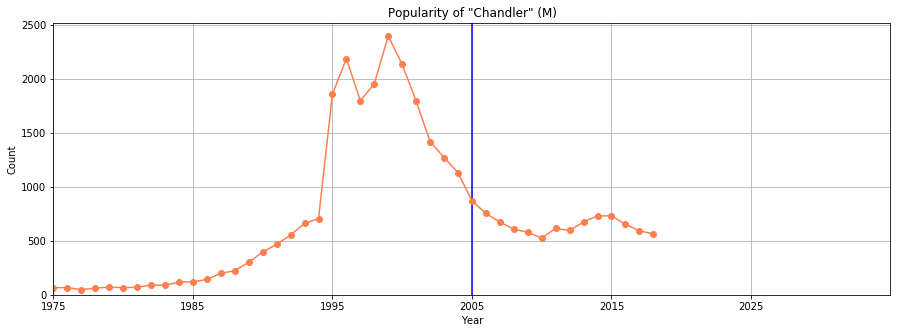

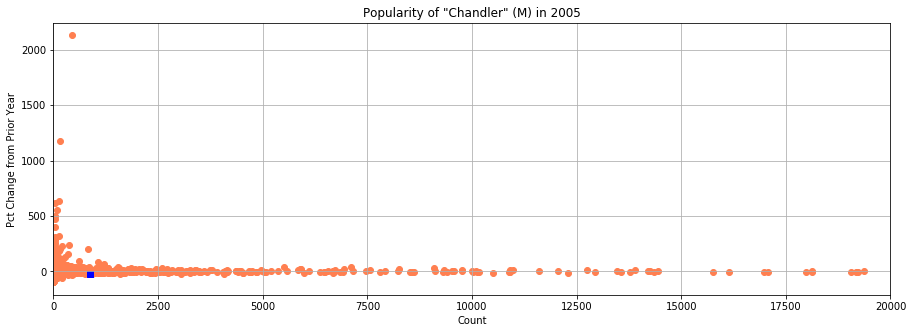

In [57]:
getPlot(name,gender,center)
getPlot2(name,gender,center)